In [304]:
#importing necessary libraries for data analysis
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [305]:
#Reading csv file that contains govt. spending data sourced from trading economics
govt_spending_df = pd.read_csv(Path("govt_spending_%_gdp.csv"))
govt_spending_df.head()

,Year,Govt Spending as a % of GDP
0,1960,11.189358
1,1961,11.425320
2,1962,12.074878
3,1963,11.787033
4,1964,11.471861


In [306]:
#Resetting index to column named Year
govt_spending_df = govt_spending_df.set_index('Year')

In [307]:
govt_spending_df.head()

,Govt Spending as a % of GDP
Year,
1960,11.189358
1961,11.425320
1962,12.074878
1963,11.787033
1964,11.471861


In [308]:
#Plotting government spending across full timeframe
govt_spending_df.hvplot.line(
    title="Govt. Spending as a % of GDP"
)

:Curve   [Year]   (Govt Spending as a % of GDP)

In [309]:
#Cleaning data frame into selected time frame for analysis - the 60s
govt_spending_60s = govt_spending_df[0:11]
govt_spending_60s.head()

,Govt Spending as a % of GDP
Year,
1960,11.189358
1961,11.425320
1962,12.074878
1963,11.787033
1964,11.471861


In [310]:
#Similarly cleaning data frame for analysis of last decade
govt_spending_now = govt_spending_df[-11:]
govt_spending_now.head()

,Govt Spending as a % of GDP
Year,
2011,17.925478
2012,18.148771
2013,18.073890
2014,17.974944
2015,18.348738


In [311]:
#Adjusting index of both 60s and recent df to enable concat function
govt_spending_60s = govt_spending_60s.reset_index()
govt_spending_60s.head()

,Year,Govt Spending as a % of GDP
0,1960,11.189358
1,1961,11.425320
2,1962,12.074878
3,1963,11.787033
4,1964,11.471861


In [312]:
govt_spending_60s = govt_spending_60s.drop(columns=['Year'])
govt_spending_60s = govt_spending_60s.rename(columns={"Govt Spending as a % of GDP":"1960-1970"})
govt_spending_60s.head()

,1960-1970
0,11.189358
1,11.425320
2,12.074878
3,11.787033
4,11.471861


In [313]:
govt_spending_now = govt_spending_now.reset_index()
govt_spending_now.head()

,Year,Govt Spending as a % of GDP
0,2011,17.925478
1,2012,18.148771
2,2013,18.073890
3,2014,17.974944
4,2015,18.348738


In [314]:
govt_spending_now = govt_spending_now.drop(columns=['Year'])
govt_spending_now = govt_spending_now.rename(columns={"Govt Spending as a % of GDP":"2011-2021"})
govt_spending_now.head()

,2011-2021
0,17.925478
1,18.148771
2,18.073890
3,17.974944
4,18.348738


In [315]:
#Concatenating 60s and twenties govt. spending df's for correlation analysis
gs_comparison = pd.concat([govt_spending_60s,govt_spending_now],axis="columns",join="inner")
gs_comparison.head()

,1960-1970,2011-2021
0,11.189358,17.925478
1,11.425320,18.148771
2,12.074878,18.073890
3,11.787033,17.974944
4,11.471861,18.348738


In [316]:
#Plotting two data frames over lapping eachother using index of # of years as opposed to specific years
gs_comparison.hvplot.line(
    title = "Govt. Spending as a % of GDP",
    ylabel = "Govt. Spending as a % of GDP",
    xlabel = "Years"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [317]:
#Correlation analysis - proving a highly correlated economic environment for government spending
gs_comparison.corr()

,1960-1970,2011-2021
1960-1970,1.000000,0.777475
2011-2021,0.777475,1.000000


In [318]:
#All data related to inflation below sourced from Mal's inflation data analysis
import pandas as pd
import numpy as np
import hvplot.pandas

In [319]:
inf_url = "https://www.rateinflation.com/inflation-rate/australia-historical-inflation-rate/"

In [320]:
inflation_df = pd.read_html(inf_url)
inflation_df

[    Year    mar    jun    sep    dec  Annual
 0   2022   5.1%   6.1%    NaN    NaN     NaN
 1   2021   1.1%   3.8%   3.0%   3.5%    2.9%
 2   2020   2.2%  -0.3%   0.7%   0.9%    0.8%
 3   2019   1.3%   1.6%   1.7%   1.8%    1.6%
 4   2018   1.9%   2.1%   1.9%   1.8%    1.9%
 ..   ...    ...    ...    ...    ...     ...
 69  1953   6.8%   4.9%   4.8%   1.6%    4.5%
 70  1952  22.9%  19.6%  17.0%  10.5%   17.2%
 71  1951  14.3%  18.6%  20.5%  23.9%   19.4%
 72  1950   7.7%   7.5%   7.3%  12.2%    8.7%
 73  1949     ∞%     ∞%  10.8%   7.9%  114.7%
 
 [74 rows x 6 columns]]

In [321]:
inflation_df = inflation_df[0]
inflation_df

,Year,mar,jun,sep,dec,Annual
0,2022,5.1%,6.1%,NaN,NaN,NaN
1,2021,1.1%,3.8%,3.0%,3.5%,2.9%
2,2020,2.2%,-0.3%,0.7%,0.9%,0.8%
3,2019,1.3%,1.6%,1.7%,1.8%,1.6%
4,2018,1.9%,2.1%,1.9%,1.8%,1.9%
...,...,...,...,...,...,...
69,1953,6.8%,4.9%,4.8%,1.6%,4.5%
70,1952,22.9%,19.6%,17.0%,10.5%,17.2%
71,1951,14.3%,18.6%,20.5%,23.9%,19.4%
72,1950,7.7%,7.5%,7.3%,12.2%,8.7%


In [322]:
inflation_df = inflation_df.set_index("Year")
inflation_df.index

Int64Index([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
            2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
            2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
            1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
            1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
            1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957,
            1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949],
           dtype='int64', name='Year')

In [323]:
inflation_df["Annual"] = inflation_df["Annual"].str.replace("%", "").astype(float)
inflation_df["Annual"]

Year
2022      NaN
2021      2.9
2020      0.8
2019      1.6
2018      1.9
        ...  
1953      4.5
1952     17.2
1951     19.4
1950      8.7
1949    114.7
Name: Annual, Length: 74, dtype: float64

In [324]:
inflation_df.head()

,mar,jun,sep,dec,Annual
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9


In [325]:
# Here I rename the Annual column as this will conflict with CPI dataset

inflation_df.rename(columns = {'Annual':'Annual_Inflation'}, inplace = True)
inflation_df

,mar,jun,sep,dec,Annual_Inflation
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9
...,...,...,...,...,...
1953,6.8%,4.9%,4.8%,1.6%,4.5
1952,22.9%,19.6%,17.0%,10.5%,17.2
1951,14.3%,18.6%,20.5%,23.9%,19.4


In [326]:
inflation_df["Annual_Inflation"].hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (Annual_Inflation)

In [327]:
seventies_df = inflation_df.rename(columns = {'Annual_Inflation':'seventies_inflation'})
seventies_df = seventies_df["seventies_inflation"].iloc[43:57]
seventies_df

Year
1979     9.1
1978     8.0
1977    12.3
1976    13.3
1975    15.2
1974    15.4
1973     9.1
1972     6.0
1971     6.1
1970     3.4
1969     3.3
1968     2.5
1967     3.5
1966     3.3
Name: seventies_inflation, dtype: float64

In [328]:
seventies_df.hvplot(
    label="Seventies Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (seventies_inflation)

In [329]:
twenties_df = inflation_df.rename(columns = {'Annual_Inflation':'twenties_inflation'})
twenties_df = twenties_df.iloc[1:13]

In [330]:
twenties_df.hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (twenties_inflation)

In [331]:
comparison = pd.concat([seventies_df, twenties_df], axis=1)

In [332]:
comparison = comparison.drop(["mar", "jun", "sep", "dec"], axis=1)
comparison

,seventies_inflation,twenties_inflation
Year,,
1966,3.3,NaN
1967,3.5,NaN
1968,2.5,NaN
1969,3.3,NaN
1970,3.4,NaN
1971,6.1,NaN
1972,6.0,NaN
1973,9.1,NaN
1974,15.4,NaN


<AxesSubplot:xlabel='Year'>

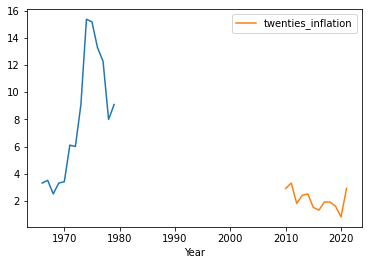

In [333]:
ax = seventies_df.plot()
twenties_df.plot(ax=ax)

In [334]:
# Cleaning govt. spending df to match dates of inflation data
gs_60s = govt_spending_df[6:20]
gs_60s

,Govt Spending as a % of GDP
Year,
1966,12.917777
1967,12.889935
1968,13.726765
1969,13.169704
1970,13.286372
1971,14.029570
1972,14.539007
1973,14.739821
1974,14.577467


In [335]:
# Concatenating Govt. Spending and inflation for 60s-70s for plotting and correlation analysis
gs_inflation_60s = pd.concat([gs_60s,seventies_df],axis=1)
gs_inflation_60s

,Govt Spending as a % of GDP,seventies_inflation
Year,,
1966,12.917777,3.3
1967,12.889935,3.5
1968,13.726765,2.5
1969,13.169704,3.3
1970,13.286372,3.4
1971,14.029570,6.1
1972,14.539007,6.0
1973,14.739821,9.1
1974,14.577467,15.4


In [336]:
gs_inflation_60s.hvplot.line(xlabel="Year")

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [337]:
#Checking correlation between government spending and inflation in the 66-79 period - proving highly correlated into the thick of inflationary 70s
gs_inflation_60s.corr()

,Govt Spending as a % of GDP,seventies_inflation
Govt Spending as a % of GDP,1.000000,0.711314
seventies_inflation,0.711314,1.000000


In [338]:
#Conducting same cleaning, concatenating and analysis of the last decade as previously done for the 60s/70s
gs_now = govt_spending_df[-12:]
gs_now

,Govt Spending as a % of GDP
Year,
2010,18.107653
2011,17.925478
2012,18.148771
2013,18.073890
2014,17.974944
2015,18.348738
2016,19.088894
2017,19.039523
2018,19.106366


In [339]:
gs_inflation_now = pd.concat([twenties_df,gs_now],axis=1)
gs_inflation_now = gs_inflation_now.drop(["mar", "jun", "sep", "dec"], axis=1)
gs_inflation_now

,twenties_inflation,Govt Spending as a % of GDP
Year,,
2010,2.9,18.107653
2011,3.3,17.925478
2012,1.8,18.148771
2013,2.4,18.073890
2014,2.5,17.974944
2015,1.5,18.348738
2016,1.3,19.088894
2017,1.9,19.039523
2018,1.9,19.106366


In [340]:
gs_inflation_now.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [341]:
# Correlation analysis - negatively correlating over this time period hence proving it is not considered to be a lead indicator and perhaps only follows as inflation occurs hence being a slightly lag indicator...
gs_inflation_now.corr()

,twenties_inflation,Govt Spending as a % of GDP
twenties_inflation,1.000000,-0.305409
Govt Spending as a % of GDP,-0.305409,1.000000


In [342]:
inflation_df = inflation_df.drop(["mar", "jun", "sep", "dec"], axis=1)
inflation_df = inflation_df[:-11]
inflation_df

,Annual_Inflation
Year,
2022,NaN
2021,2.9
2020,0.8
2019,1.6
2018,1.9
...,...
1964,2.9
1963,0.6
1962,-0.3


In [343]:
gs_inflation = pd.concat([govt_spending_df,inflation_df],axis=1)
gs_inflation

,Govt Spending as a % of GDP,Annual_Inflation
Year,,
1960,11.189358,3.7
1961,11.425320,2.3
1962,12.074878,-0.3
1963,11.787033,0.6
1964,11.471861,2.9
...,...,...
2018,19.106366,1.9
2019,19.472898,1.6
2020,20.861886,0.8


In [344]:
gs_inflation.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [345]:
#Correlation of the 2 data points of the entire historical period proving little correlation, hence limiting the weighting one must put on govt. spending as an indicator for inflation
gs_inflation.corr()

,Govt Spending as a % of GDP,Annual_Inflation
Govt Spending as a % of GDP,1.000000,0.044807
Annual_Inflation,0.044807,1.000000
